# Who asks questions at astronomy meetings?
This notebook contains the code that was used to calculate the stats and create the figures in the Nature Astronomy comment by [S. Schmidt and J. Davenport (2017)](http://rdcu.be/tb3q)

For more information on this ongoing survey, see [this GitHub repository](https://github.com/jradavenport/Gender-in-Astro).

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib
from astropy.stats import funcs

matplotlib.rcParams.update({'font.size':16})
matplotlib.rcParams.update({'font.family':'serif'})

In [2]:
dir = '../../data/aas'
aas = ['223', '225', '227', '229']
year = [2014.0, 2015.0, 2016.0, 2017.0]

In [3]:
Ntalks = np.array(np.zeros(len(aas)), dtype='float')
# Total number of speakers
Mspeakers = np.array(np.zeros(len(aas)), dtype='float')
Fspeakers = np.array(np.zeros(len(aas)), dtype='float')

Mspeakers_err = np.array(np.zeros((len(aas),2)), dtype='float')
Fspeakers_err = np.array(np.zeros((len(aas),2)), dtype='float')

# Total number of questions (or comments)
Mquests = np.array(np.zeros(len(aas)), dtype='float')
Fquests = np.array(np.zeros(len(aas)), dtype='float')

Mquests_err = np.array(np.zeros((len(aas),2)), dtype='float')
Fquests_err = np.array(np.zeros((len(aas),2)), dtype='float')

# loop over all the AAS input files
for i in range(len(aas)):
    print(dir + str.lower(aas[i]) + '/data.csv')
    df = pd.read_csv(dir + str.lower(aas[i]) + '/data.csv')
    
    Ntalks[i] = len(df)
    
    # count the number of (fe)male speakers
    Mspeakers[i] = sum(df['speaker'].str.lower() == 'm')
    Fspeakers[i] = sum(df['speaker'].str.lower() == 'f')
    
    # how to calc errors on yes/no stats
    Mspeakers_err[i,:] = funcs.binom_conf_interval(Mspeakers[i], Mspeakers[i] + Fspeakers[i], interval='wald')
    Fspeakers_err[i,:] = funcs.binom_conf_interval(Fspeakers[i], Mspeakers[i] + Fspeakers[i], interval='wald')
    
    # count number of (fe)male questions
    Fquests[i] = df['questions'].str.lower().str.count('f').sum()
    Mquests[i] = df['questions'].str.lower().str.count('m').sum()
    
    Mquests_err[i,:] = funcs.binom_conf_interval(Mquests[i], Mquests[i] + Fquests[i], interval='wald')
    Fquests_err[i,:] = funcs.binom_conf_interval(Fquests[i], Mquests[i] + Fquests[i], interval='wald')
    
print('Total # talks: ', sum(Ntalks))
print('Total # questions: ', sum(Mquests + Fquests))

../gender_astro/Gender-in-Astro/data/aas223/data.csv
../gender_astro/Gender-in-Astro/data/aas225/data.csv
../gender_astro/Gender-in-Astro/data/aas227/data.csv
../gender_astro/Gender-in-Astro/data/aas229/data.csv
('Total # talks: ', 966.0)
('Total # questions: ', 2575.0)


0.361196962759
0.638803037241
0.244095434298
0.755904565702
('SEM F Ss = ', 0.0098984719501099029)
('SEM M Ss = ', 0.0098984719501098942)
('SEM F Qs = ', 0.010010091472038121)
('SEM M Qs = ', 0.010010091472038116)


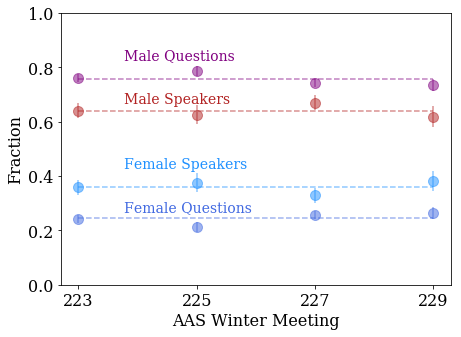

In [4]:
plt.figure(figsize=(7,5))
# plt.plot(year, Fspeakers / (Mspeakers + Fspeakers), c='RoyalBlue', marker='o', ms=10)
plt.errorbar(year, Fspeakers / (Mspeakers + Fspeakers), 
             yerr=np.abs(Fspeakers_err.T - Fspeakers / (Mspeakers + Fspeakers)),
             c='DodgerBlue', marker='o', ms=10, alpha=0.5, linestyle='none')
plt.plot(year, np.mean(Fspeakers / (Mspeakers + Fspeakers))*np.ones(len(year)), 
         c='DodgerBlue', linestyle='--', alpha=0.5)
print(np.mean(Fspeakers / (Mspeakers + Fspeakers)))


# plt.plot(year, Mspeakers / (Mspeakers + Fspeakers), c='FireBrick', marker='o', ms=10)
plt.errorbar(year, Mspeakers / (Mspeakers + Fspeakers), 
             yerr=np.abs(Mspeakers_err.T - Mspeakers / (Mspeakers + Fspeakers)),
             c='FireBrick', marker='o', ms=10, alpha=0.5, linestyle='none')
plt.plot(year, np.mean(Mspeakers / (Mspeakers + Fspeakers))*np.ones(len(year)), 
         c='FireBrick', linestyle='--', alpha=0.5)
print(np.mean(Mspeakers / (Mspeakers + Fspeakers)))



# plt.plot(year, Fquests / (Mquests + Fquests), c='DeepSkyBlue', marker='o', ms=10)
plt.errorbar(year, Fquests / (Mquests + Fquests),
             yerr=np.abs(Fquests_err.T - Fquests / (Mquests + Fquests)),
             c='RoyalBlue', marker='o', ms=10, alpha=0.5, linestyle='none')
plt.plot(year, np.mean(Fquests / (Mquests + Fquests))*np.ones(len(year)), 
         c='RoyalBlue', linestyle='--', alpha=0.5)
print(np.mean(Fquests / (Mquests + Fquests)))

# plt.plot(year, Mquests / (Mquests + Fquests), c='purple', marker='o', ms=10)
plt.errorbar(year, Mquests / (Mquests + Fquests),
             yerr=np.abs(Mquests_err.T - Mquests / (Mquests + Fquests)),
             c='purple', marker='o', ms=10, alpha=0.5, linestyle='none')
plt.plot(year, np.mean(Mquests / (Mquests + Fquests))*np.ones(len(year)), 
         c='purple', linestyle='--', alpha=0.5)
print(np.mean(Mquests / (Mquests + Fquests)))


plt.figtext(0.25, 0.75, 'Male Questions', color='purple', fontsize=14)
plt.figtext(0.25, 0.63, 'Male Speakers', color='FireBrick', fontsize=14)
plt.figtext(0.25, 0.33, 'Female Questions', color='RoyalBlue', fontsize=14)
plt.figtext(0.25, 0.45, 'Female Speakers', color='DodgerBlue', fontsize=14)

aas_l = ['223', '225', '227', '229']
plt.xticks(year, aas_l)
plt.xlabel('AAS Winter Meeting')

plt.ylabel('Fraction')
plt.ylim(0,1)

plt.savefig('ratios.pdf', bbox_inches='tight', pad_inches=0.25)

print('SEM F Ss = ', np.std(Fspeakers / (Mspeakers + Fspeakers))/np.sqrt(np.size(Fspeakers)))
print('SEM M Ss = ', np.std(Mspeakers / (Mspeakers + Fspeakers))/np.sqrt(np.size(Mspeakers)))
print('SEM F Qs = ', np.std(Fquests / (Mquests + Fquests))/np.sqrt(np.size(Fquests)))
print('SEM M Qs = ', np.std(Mquests / (Mquests + Fquests))/np.sqrt(np.size(Mquests)))

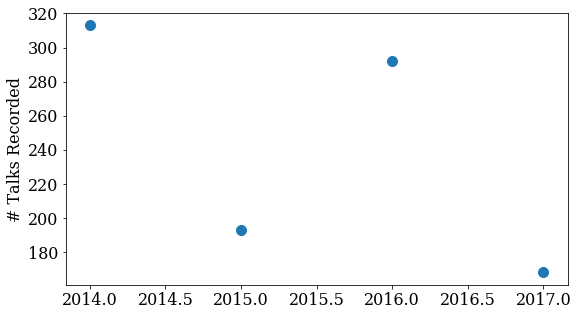

In [5]:
plt.figure(figsize=(9,5))
plt.scatter(year, Ntalks, s=100)
plt.ylabel('# Talks Recorded')
# plt.savefig('Ntalks.png')

In [6]:
# ratio of Q's if 1st is F vs if 1st is M

# PREP THE DATA
for i in range(len(aas)):
# for i in [3]:
    print(dir + str.lower(aas[i]) + '/data.csv')
    df = pd.read_csv(dir + str.lower(aas[i]) + '/data.csv')
    if i == 0:
        all_Q = df['questions'].str.lower()
    if i > 0:
        all_Q = np.concatenate((all_Q, df['questions'].str.lower()))

all_Qs = pd.DataFrame(data={'questions':all_Q})

# first Q = M or F, & more than 1 Q
xm = np.where((all_Qs['questions'].str[0] == 'm') & (all_Qs['questions'].str.count(r'f|m') > 1))
xf = np.where((all_Qs['questions'].str[0] == 'f') & (all_Qs['questions'].str.count(r'f|m') > 1))

# actually calculate ratios
fxm = float(sum(all_Qs['questions'].loc[xm].str[1:].str.count('f')))
mxm = float(sum(all_Qs['questions'].loc[xm].str[1:].str.count('m')))

fxf = float(sum(all_Qs['questions'].loc[xf].str[1:].str.count('f')))
mxf = float(sum(all_Qs['questions'].loc[xf].str[1:].str.count('m')))

print('')
print('fraction F given M 1st Q: ', fxm / (fxm + mxm))
print('error range: ', funcs.binom_conf_interval(fxm, fxm+mxm, interval='wald'))

print('fraction F given F 1st Q: ', fxf / (fxf + mxf))
print('error range: ', funcs.binom_conf_interval(fxf, fxf+mxf, interval='wald'))

../gender_astro/Gender-in-Astro/data/aas223/data.csv
../gender_astro/Gender-in-Astro/data/aas225/data.csv
../gender_astro/Gender-in-Astro/data/aas227/data.csv
../gender_astro/Gender-in-Astro/data/aas229/data.csv

('fraction F given M 1st Q: ', 0.2574898785425101)
('error range: ', array([ 0.24504765,  0.26993211]))
('fraction F given F 1st Q: ', 0.2225)
('error range: ', array([ 0.20170372,  0.24329628]))


Not able to reproduce result from [225 Hack Day investigation](https://github.com/jradavenport/aas225-gender/blob/master/analysis.ipynb): no clear benifit to 1st Q being M or F in ratio of Q's 2 through *

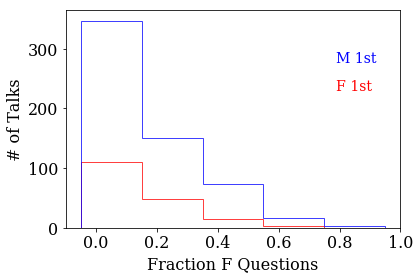

In [7]:
_ = plt.hist(all_Qs['questions'].loc[xf].str[1:].str.count('f') / all_Qs['questions'].loc[xf].str.count(r'f|m'),
            alpha=0.75, histtype='step', bins=np.arange(-.05,1.05,.2), normed=False, color='red')
_ = plt.hist(all_Qs['questions'].loc[xm].str[1:].str.count('f') / all_Qs['questions'].loc[xm].str.count(r'f|m'),
            alpha=0.75, histtype='step', bins=np.arange(-.05,1.05,.2), normed=False, color='blue')

plt.xlabel('Fraction F Questions')
plt.ylabel('# of Talks')

plt.figtext(.75, .7, 'M 1st', color='blue', fontsize=14)
plt.figtext(.75, .6, 'F 1st', color='red', fontsize=14)
plt.savefig('firstQ.pdf', bbox_inches='tight', pad_inches=0.25)

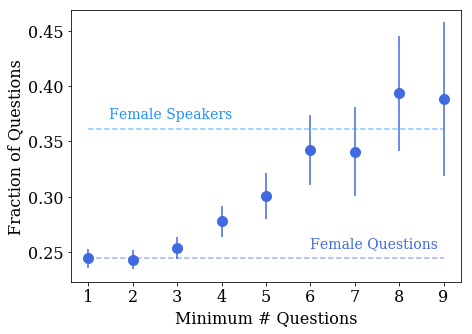

In [8]:
# F/M ratio vs total number of Q's
Nq = 9
Fn = np.zeros(Nq)
Mn = np.zeros(Nq)

for k in range(len(Fn)):
    xn = np.where((all_Qs['questions'].str.count(r'f|m') >= k+1))
    Fn[k] = float(sum(all_Qs['questions'].loc[xn].str.count('f')))
    Mn[k] = float(sum(all_Qs['questions'].loc[xn].str.count('m')))


xx = np.arange(Nq) + 1
yy = Fn/(Fn+Mn)
ee = funcs.binom_conf_interval(Fn, Fn+Mn, interval='wald')

plt.figure(figsize=(7,5))
plt.errorbar(xx, yy, yerr=np.abs(ee-yy), c='RoyalBlue', marker='o', ms=10, alpha=1, linestyle='none')

plt.plot(xx, np.mean(Fquests / (Mquests + Fquests))*np.ones(len(xx)), 
         c='RoyalBlue', linestyle='--', alpha=0.5)

plt.plot(xx, np.mean(Fspeakers / (Mspeakers + Fspeakers))*np.ones(len(xx)), 
         c='DodgerBlue', linestyle='--', alpha=0.5)

plt.figtext(.6, 0.22, 'Female Questions', color='RoyalBlue', fontsize=14)
plt.figtext(0.2, 0.58, 'Female Speakers', color='DodgerBlue', fontsize=14)
# plt.minorticks_on()

nums = ['1','2','3','4','5','6','7','8','9']
plt.xticks(np.arange(1,10),nums)


plt.ylabel('Fraction of Questions')
plt.xlabel('Minimum # Questions')

plt.savefig('frac_v_N.pdf', bbox_inches='tight', pad_inches=0.25)

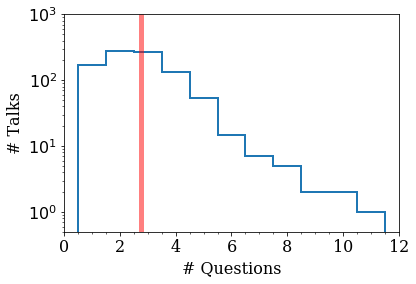

In [9]:
Nquest = all_Qs['questions'].str.count(r'f|m')
okn = Nquest > 0

_ = plt.hist(Nquest[okn], bins=np.arange(-0.5,15),histtype='step', lw=2)
plt.vlines(np.mean(Nquest[okn]), 1e-1, 1e3, colors=['red'], alpha=0.5, lw=5)

plt.yscale('log')
plt.minorticks_on()

plt.xlim(0,12)
plt.ylim(5e-1, 1e3)
plt.xlabel('# Questions')
plt.ylabel('# Talks')

plt.savefig('Nquestion_hist.pdf', bbox_inches='tight', pad_inches=0.25)

('fraction subsequent F given M first Q: ', 0.2574898785425101)
('fraction subsequent F given F first Q: ', 0.2225)
('fraction subsequent F given M first Q: ', 0.26548672566371684)
('fraction subsequent F given F first Q: ', 0.23684210526315788)
('fraction subsequent F given M first Q: ', 0.28449744463373083)
('fraction subsequent F given F first Q: ', 0.2610619469026549)
('fraction subsequent F given M first Q: ', 0.2935153583617747)
('fraction subsequent F given F first Q: ', 0.33043478260869563)
('fraction subsequent F given M first Q: ', 0.33793103448275863)
('fraction subsequent F given F first Q: ', 0.4117647058823529)
('fraction subsequent F given M first Q: ', 0.3263157894736842)
('fraction subsequent F given F first Q: ', 0.5)


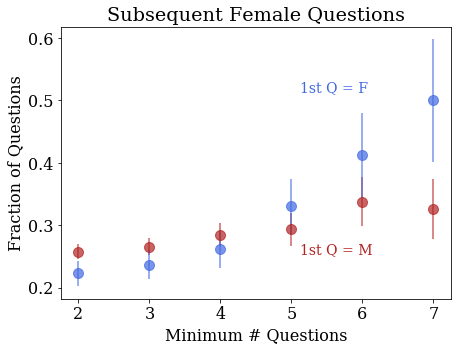

In [10]:
# impact of 1st Q being F vs M
Nt = 6

plt.figure(figsize=(7,5))

yy1 = np.zeros(Nt)
ee1 = np.zeros((Nt,2))
yy2 = np.zeros(Nt)
ee2 = np.zeros((Nt,2))

for i in range(Nt):

    xm = np.where((all_Qs['questions'].str[0].str.count('m') > 0) & (all_Qs['questions'].str.count(r'f|m') > i+1))
    xf = np.where((all_Qs['questions'].str[0].str.count('f') > 0) & (all_Qs['questions'].str.count(r'f|m') > i+1))

    # actually calculate ratios
    fxm = float(sum(all_Qs['questions'].loc[xm].str[1:].str.count('f')))
    mxm = float(sum(all_Qs['questions'].loc[xm].str[1:].str.count('m')))

    fxf = float(sum(all_Qs['questions'].loc[xf].str[1:].str.count('f')))
    mxf = float(sum(all_Qs['questions'].loc[xf].str[1:].str.count('m')))

    print('fraction subsequent F given M first Q: ', fxm / (fxm + mxm))
#     print('error range: ', funcs.binom_conf_interval(fxm, fxm+mxm, interval='wald'))

    print('fraction subsequent F given F first Q: ', fxf / (fxf + mxf))
#     print('error range: ', funcs.binom_conf_interval(fxf, fxf+mxf, interval='wald'))
    
    yy1[i] = fxm / (fxm + mxm)
    ee1[i,:] = np.abs(funcs.binom_conf_interval(fxm, fxm+mxm, interval='wald') - yy1[i])
    
    yy2[i] = fxf / (fxf + mxf)
    ee2[i,:] = np.abs(funcs.binom_conf_interval(fxf, fxf+mxf, interval='wald') - yy2[i])
    
    
plt.errorbar(np.arange(2,Nt+2), yy1, yerr=ee1.T, c='FireBrick', marker='o', ms=10, alpha=.7, linestyle='none')
plt.errorbar(np.arange(2,Nt+2), yy2, yerr=ee2.T, c='RoyalBlue', marker='o', ms=10, alpha=.7, linestyle='none')
plt.ylabel('Fraction of Questions')
plt.xlabel('Minimum # Questions')
plt.title('Subsequent Female Questions')
plt.figtext(0.6, 0.25, '1st Q = M', color='FireBrick',fontsize=14)
plt.figtext(0.6, 0.7, '1st Q = F', color='RoyalBlue',fontsize=14)

plt.savefig('firstQnew.pdf', bbox_inches='tight', pad_inches=0.25)

In [11]:

# try: calc the total number of M/F in conference, and thus total # of Q's asked by M/F in conference
#      by extrapolation for whatever conferences I can find registration lists for!


In [12]:
dir2 = '../gender_astro/aas223/data/'
alltalks = pd.read_table(dir2 + 'talks.dat', delim_whitespace=True)

print('AAS 223:')
print('Total # talks:', len(alltalks))
print('M = ', sum(alltalks['speaker'].str.count('m')))
print('F = ', sum(alltalks['speaker'].str.count('f')))


allppl = pd.read_csv(dir2 + 'aas_registrant_firstname.txt.gender', names=('name','fm'))
print('')
print('Total # attendees:', len(allppl))
print('M = ', sum(allppl['fm'].str.count('m')))
print('F = ', sum(allppl['fm'].str.count('f')))
print('? = ', sum(allppl['fm'].str.count('x')))


df = pd.read_csv(dir + '223/data.csv')
print('')
print('Total # Qs measured:', np.sum(df['questions'].str.count(r'M|F')) )
print('M = ', np.sum(df['questions'].str.count('M')))
print('F = ', np.sum(df['questions'].str.count('F')))
print('from # talks measured:', len(df))

print('')
print('Approximating...')
print('Total # Qs asked at AAS 223:', 
      np.sum(df['questions'].str.count(r'M|F')) / float(len(df)) * float(len(alltalks)))
print('M = ', np.sum(df['questions'].str.count('M')) / float(len(df)) * float(len(alltalks)))
print('F = ', np.sum(df['questions'].str.count('F')) / float(len(df)) * float(len(alltalks)))

print('Total rate of Qs asked at AAS 223 (#/person):', 
     np.sum(df['questions'].str.count(r'M|F')) / float(len(df)) * float(len(alltalks)) / float(len(allppl)))
print('M = ', np.sum(df['questions'].str.count('M')) / float(len(df)) * float(len(alltalks)) / float(sum(allppl['fm'].str.count('m'))))
print('F = ', np.sum(df['questions'].str.count('F')) / float(len(df)) * float(len(alltalks)) / float(sum(allppl['fm'].str.count('f'))))


AAS 223:
('Total # talks:', 872)
('M = ', 601)
('F = ', 271)

('Total # attendees:', 3132)
('M = ', 1922)
('F = ', 989)
('? = ', 221)

('Total # Qs measured:', 844.0)
('M = ', 641.0)
('F = ', 203.0)
('from # talks measured:', 313)

Approximating...
('Total # Qs asked at AAS 223:', 2351.3354632587857)
('M = ', 1785.7891373801915)
('F = ', 565.5463258785942)
('Total rate of Qs asked at AAS 223 (#/person):', 0.7507456779242611)
('M = ', 0.9291306646098811)
('F = ', 0.5718365276831083)
